In [28]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

In [29]:
def plot_faces(images, n_col=3, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())

In [30]:
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data

n_rows, n_cols = 2, 3
n_components = n_rows * n_cols
n_samples, n_features = faces.shape

print("Dataset consists of {} faces and {} features".format(n_samples, n_features))


Dataset consists of 400 faces and 4096 features


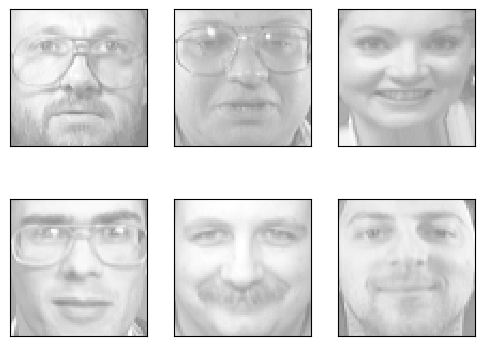

In [31]:
# plot sample data
plot_faces(faces[:n_components], n_cols, n_rows)
plt.show()

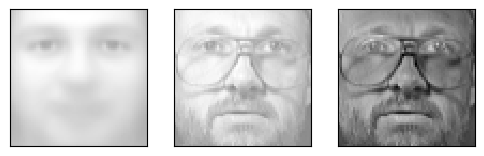

In [32]:
# normalize data
mean_face=faces.mean(axis=0)
normalized_faces=faces-mean_face
plot_faces(np.vstack((mean_face,faces[0],normalized_faces[0])),3,1)

<function matplotlib.pyplot.show(close=None, block=None)>

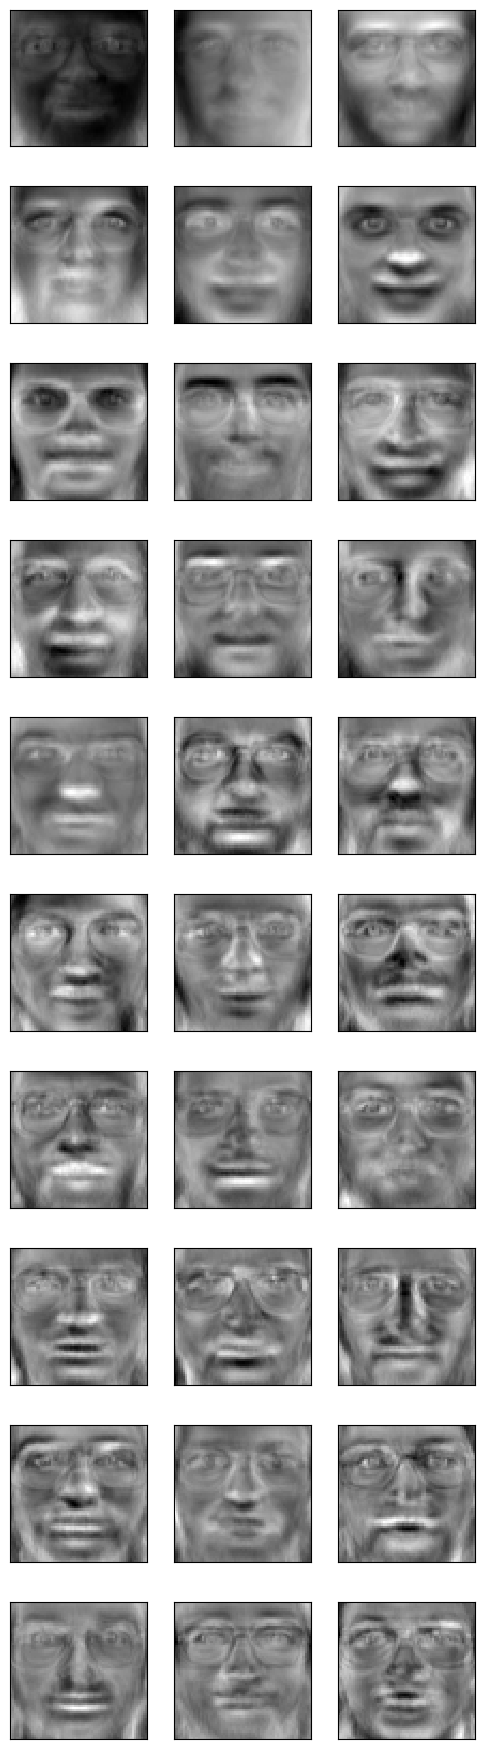

In [33]:
# perform PCA and show components
faces_pca=PCA(n_components=30)
faces_pca.fit(normalized_faces)
eigen_faces=faces_pca.components_
plot_faces(eigen_faces,3,10)
plt.show

In [34]:
import cv2
!rm tomas-face.*
!wget https://compbio.fmph.uniba.sk/vyuka/pridav/data/tomas-face.tiff
myface  = (cv2.imread("tomas-face.tiff",cv2.IMREAD_GRAYSCALE)).flatten()
myface = myface/256
#myface = faces[3]
#myface_norm = myface
myface_norm = myface - mean_face

--2023-10-11 08:17:08--  https://compbio.fmph.uniba.sk/vyuka/pridav/data/tomas-face.tiff
Resolving compbio.fmph.uniba.sk (compbio.fmph.uniba.sk)... 158.195.18.253
Connecting to compbio.fmph.uniba.sk (compbio.fmph.uniba.sk)|158.195.18.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9025 (8.8K) [image/tiff]
Saving to: ‘tomas-face.tiff’

tomas-face.tiff     100%[===================>]   8.81K  --.-KB/s    in 0.04s   

2023-10-11 08:17:08 (225 KB/s) - ‘tomas-face.tiff’ saved [9025/9025]



In [35]:
# create a vector representation of a face
myface_vector=np.matmul(eibms,np.transpose(myface_norm))
myface_vector

array([ 1.01070544e+00,  6.95801428e+00, -1.13782974e+00, -1.41578315e+00,
       -9.25050031e-01,  1.70875663e+00,  4.64157735e-01, -1.12305788e+00,
       -6.32180455e-01,  1.44427962e+00,  1.51017689e+00,  1.12312480e+00,
       -9.43671956e-02,  2.26784028e-01,  7.02498910e-01,  8.47920457e-02,
       -7.49670889e-01,  4.44691944e-01, -2.59387073e+00,  8.81780224e-01,
       -1.85417442e+00, -4.69993115e-01, -1.10952470e+00, -3.35326280e-01,
        5.71471858e-01, -3.49548179e-01, -8.33352440e-01,  5.66854891e-01,
        3.32160570e-02,  5.68375757e-03])

<function matplotlib.pyplot.show(close=None, block=None)>

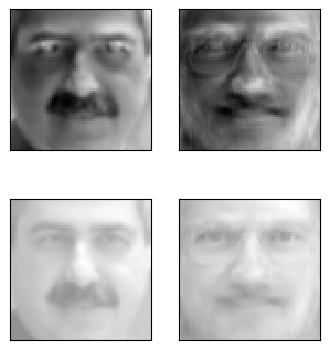

In [36]:
# compare the original face and the new face
newface=np.matmul(myface_vector,eigen_faces)
plot_faces(np.vstack((myface_norm,newface,myface,newface+mean_face)),2,2)
plt.show

In [37]:
mod_vectors=np.vstack((myface_vector,myface_vector,myface_vector,myface_vector,myface_vector))
which_feature=5
mod_vectors[0][which_feature]=-8
mod_vectors[1][which_feature]=-2
mod_vectors[2][which_feature]=0
mod_vectors[3][which_feature]=2
mod_vectors[4][which_feature]=8

modfaces=np.matmul(mod_vectors,eigen_faces)+mean_face

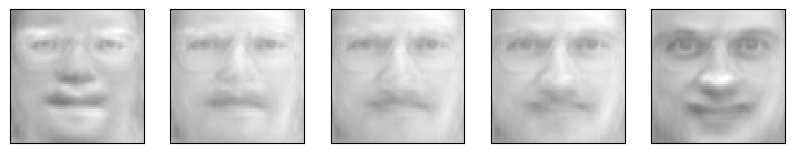

In [38]:
plot_faces(modfaces,5,1)